


Codez l’algorithme de KNN sous forme une fonction (def KNN(Data_Test, Data_Train, Label_Train, k=1, **kargs)) qui :
Calcul la distance entre Data de test et Data d’apprentissage.
Trouve la/les distances plus proche de « k » voisins.
Classe Data de test selon la classe majoritaire de « k » voisins.
Retourne la classe de Data Test.
Réalisez des expérimentations en variant la distance et le nombre de « k ».
Calculez les performances (exemple : Acc) et tracez la courbe de performance de chaque expérimentation. (Les résultats avec interprétation/argumentation doivent figurer dans le notebook comme dans le compte rendu).

In [548]:
import pandas as pd
import numpy as np
import os
import glob
import sklearn
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


df = pd.read_csv('DataSet/total.csv')
df


,Interpretation,Q1,Q10,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Score
0,C,a,0,v,c,a,b,1,3,2,1,8
1,C,a,3,c,b,a,d,1,0,2,3,9
2,C,c,1,b,a,b,a,1,2,2,3,8
3,C,b,1,c,a,d,a,2,8,3,2,7
4,C,a,1,c,a,b,a,1,2,3,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...
220,B,c,3,c,NaN,c,c,NaN,NaN,3.0,3,14
221,C,b,2,a,c,NaN,b,NaN,2.0,NaN,3,5
222,C,a,3,c,b,NaN,NaN,1.0,NaN,3.0,2,8
223,C,a,1,n,e,a,b,v,t,Y,',3


In [549]:
y=df['Interpretation']
y=np.array(y)
# le = preprocessing.LabelEncoder()
# y=le.fit_transform(y)+1
print(y)

['C' 'C' 'C' 'C' 'C' 'C' 'C' 'B' 'C' 'C' 'B' 'C' 'A' 'C' 'B' 'B' 'C' 'C'
 'C' 'C' 'B' 'C' 'C' 'B' 'C' 'C' 'C' 'B' 'C' 'C' 'B' 'C' 'B' 'C' 'C' 'C'
 'C' 'C' 'C' 'B' 'C' 'C' 'C' 'C' 'C' 'B' 'C' 'B' 'C' 'C' 'C' 'B' 'C' 'B'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'B' 'B' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'B' 'C' 'C' 'B' 'C' 'C' 'C' 'C' 'B' 'B' 'B' 'C' 'B' 'B' 'B' 'C'
 'C' 'C' 'C' 'B' 'B' 'C' 'B' 'C' 'C' 'C' 'B' 'C' 'B' 'B' 'B' 'C' 'B' 'B'
 'B' 'B' 'B' 'B' 'C' 'B' 'C' 'B' 'C' 'B' 'B' 'C' 'C' 'C' 'C' 'C' 'B' 'B'
 'B' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'A' 'C' 'C' 'C' 'C' 'C' 'C' 'B'
 'B' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'B' 'B' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'B' 'B' 'B' 'A' 'C' 'C' 'C' 'B' 'B' 'B' 'B' 'C' 'C' 'B' 'B'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'B' 'C' 'C' 'B' 'A' 'B' 'C' 'C' 'B' 'B' 'B'
 'B' 'B' 'B' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'B' 'B' 'C' 'C' 'C' 'B'
 'B' 'A' 'B' 'C' 'B' 'C' 'C' 'C' 'C']


In [550]:
df.info() # Description :
df.head(5) # Description :
df.shape # Description :
df.columns # Description :
df["Q1"].nunique() # Description :
df["Q1"].unique() # Description :
df.columns.nunique() # Description :
df['Score'].value_counts() # Description :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Interpretation  225 non-null    object
 1   Q1              217 non-null    object
 2   Q10             217 non-null    object
 3   Q2              213 non-null    object
 4   Q3              212 non-null    object
 5   Q4              215 non-null    object
 6   Q5              211 non-null    object
 7   Q6              213 non-null    object
 8   Q7              215 non-null    object
 9   Q8              213 non-null    object
 10  Q9              215 non-null    object
 11  Score           225 non-null    int64 
dtypes: int64(1), object(11)
memory usage: 21.2+ KB


8     33
10    26
9     24
6     22
7     19
0     15
11    13
4     10
12    10
5      9
14     8
13     6
1      6
3      5
20     5
2      5
17     4
16     3
19     2
Name: Score, dtype: int64

In [551]:
print(df.isna().sum())

Interpretation     0
Q1                 8
Q10                8
Q2                12
Q3                13
Q4                10
Q5                14
Q6                12
Q7                10
Q8                12
Q9                10
Score              0
dtype: int64


Je décide de partir du principe de remplacer les valeurs erronées et manquantes par des valeurs qui n'influenceront pas le score. D'après le code Python, ces valeurs sont b ou 2. 

In [552]:
df_lettre=df[["Q1","Q2","Q3","Q4","Q5"]]
df_lettre=df_lettre.replace({'A':'a', 'B': 'b', 'C': 'c'})
df_lettre=df_lettre[df_lettre.isin(["a","b","c"])]
# print(df_lettre.mode())
df_lettre= df_lettre.fillna(df_lettre.mode().iloc[0])
# df_lettre= df_lettre.fillna('b')
print(df_lettre)
print(df_lettre.isna().sum())

    Q1 Q2 Q3 Q4 Q5
0    a  b  c  a  b
1    a  c  b  a  a
2    c  b  a  b  a
3    b  c  a  a  a
4    a  c  a  b  a
..  .. .. .. .. ..
220  c  c  c  c  c
221  b  a  c  a  b
222  a  c  b  a  a
223  a  b  c  a  b
224  a  b  c  a  a

[225 rows x 5 columns]
Q1    0
Q2    0
Q3    0
Q4    0
Q5    0
dtype: int64


In [553]:
le = preprocessing.LabelEncoder()
for i in df_lettre:
    df_lettre[i]=le.fit_transform(df_lettre[i])+1

print(df_lettre,df.shape)

     Q1  Q2  Q3  Q4  Q5
0     1   2   3   1   2
1     1   3   2   1   1
2     3   2   1   2   1
3     2   3   1   1   1
4     1   3   1   2   1
..   ..  ..  ..  ..  ..
220   3   3   3   3   3
221   2   1   3   1   2
222   1   3   2   1   1
223   1   2   3   1   2
224   1   2   3   1   1

[225 rows x 5 columns] (225, 12)


In [554]:
df_num=df[["Q6","Q7","Q8","Q9","Q10"]]
df_num=df_num[df_num.isin(["1","2","3"])]
df_num=df_num.replace({'1':1, '2': 2, '3': 3})
df_num= df_num.fillna(df_num.mode().iloc[0])
# df_num= df_num.fillna(2)
print(df_num)
print(df_num.isna().sum())

      Q6   Q7   Q8   Q9  Q10
0    1.0  3.0  2.0  1.0  2.0
1    1.0  3.0  2.0  3.0  3.0
2    1.0  2.0  2.0  3.0  1.0
3    2.0  3.0  3.0  2.0  1.0
4    1.0  2.0  3.0  2.0  1.0
..   ...  ...  ...  ...  ...
220  2.0  3.0  2.0  3.0  3.0
221  2.0  3.0  2.0  3.0  2.0
222  2.0  3.0  2.0  2.0  3.0
223  2.0  3.0  2.0  2.0  1.0
224  2.0  2.0  2.0  2.0  3.0

[225 rows x 5 columns]
Q6     0
Q7     0
Q8     0
Q9     0
Q10    0
dtype: int64


In [555]:
print (df_num)

      Q6   Q7   Q8   Q9  Q10
0    1.0  3.0  2.0  1.0  2.0
1    1.0  3.0  2.0  3.0  3.0
2    1.0  2.0  2.0  3.0  1.0
3    2.0  3.0  3.0  2.0  1.0
4    1.0  2.0  3.0  2.0  1.0
..   ...  ...  ...  ...  ...
220  2.0  3.0  2.0  3.0  3.0
221  2.0  3.0  2.0  3.0  2.0
222  2.0  3.0  2.0  2.0  3.0
223  2.0  3.0  2.0  2.0  1.0
224  2.0  2.0  2.0  2.0  3.0

[225 rows x 5 columns]


In [556]:
df = pd.concat((df_lettre, df_num), axis=1)
x=np.array(df)
all=np.column_stack((x,y))
print(x,x.shape)
print(y,y.shape)
x=pd.DataFrame(x)
y=pd.DataFrame(y)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

[[1. 2. 3. ... 2. 1. 2.]
 [1. 3. 2. ... 2. 3. 3.]
 [3. 2. 1. ... 2. 3. 1.]
 ...
 [1. 3. 2. ... 2. 2. 3.]
 [1. 2. 3. ... 2. 2. 1.]
 [1. 2. 3. ... 2. 2. 3.]] (225, 10)
['C' 'C' 'C' 'C' 'C' 'C' 'C' 'B' 'C' 'C' 'B' 'C' 'A' 'C' 'B' 'B' 'C' 'C'
 'C' 'C' 'B' 'C' 'C' 'B' 'C' 'C' 'C' 'B' 'C' 'C' 'B' 'C' 'B' 'C' 'C' 'C'
 'C' 'C' 'C' 'B' 'C' 'C' 'C' 'C' 'C' 'B' 'C' 'B' 'C' 'C' 'C' 'B' 'C' 'B'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'B' 'B' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'B' 'C' 'C' 'B' 'C' 'C' 'C' 'C' 'B' 'B' 'B' 'C' 'B' 'B' 'B' 'C'
 'C' 'C' 'C' 'B' 'B' 'C' 'B' 'C' 'C' 'C' 'B' 'C' 'B' 'B' 'B' 'C' 'B' 'B'
 'B' 'B' 'B' 'B' 'C' 'B' 'C' 'B' 'C' 'B' 'B' 'C' 'C' 'C' 'C' 'C' 'B' 'B'
 'B' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'A' 'C' 'C' 'C' 'C' 'C' 'C' 'B'
 'B' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'B' 'B' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'B' 'B' 'B' 'A' 'C' 'C' 'C' 'B' 'B' 'B' 'B' 'C' 'C' 'B' 'B'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'B' 'C' 'C' 'B' 'A' 'B' 'C' 'C' 'B' 'B' 'B'
 'B' 'B' 'B' 'C' 'C' 'C' 'C' 'C

## Préparez une fonction permettant de calculer les 3 différentes distances : Euclidean, Manhattan et Minkowski, (def distance(metric=’ Euclidean’, **kargs)).

In [557]:
def calc_distance(Data_1, Data_2, metric='euclidean', **kargs):
    
    if kargs.items():
        
        for key,value in kargs.items():
            if key == 'p' :
                p = value
    else :
        p = 3
    
    if metric == 'euclidean' :
        Dis = np.sqrt(np.sum((Data_1-Data_2)**2))
    elif metric == 'manhattan' :
        Dis = np.abs(np.sum(Data_1-Data_2))
    elif metric == 'minkowski':
            Dis = (np.sum(np.abs(Data_1-Data_2))**p)**(1/p)
    return Dis

In [558]:
def distance(Data_1, Data_2, metric='euclidean', **kargs):
    
    for key,value in kargs.items():
        if key == 'p' :
            p = value
        else :
            p = 3
    
    if metric == 'euclidean' :
        Dis = np.sqrt(np.sum((Data_1-Data_2)**2))
    elif metric == 'manhattan' :
        Dis = np.abs(np.sum(Data_1-Data_2))
    elif metric == 'minkowski':
            Dis = (np.sum(np.abs(Data_1-Data_2))**3)**(1/3)
    return Dis


def knn(x_test, x_train, y_train, k, metric) :
    

    Resultat = []
    for j in range(0,len(x_test)):
    
        D_T = x_test.iloc[j,:]

        Distance = []
        for i in range(0,len(x_train)):
            D_A = x_train.iloc[i,:]
            Dis = distance(D_T, D_A, metric=metric)
            Distance.append(Dis)

        SS = np.sort(Distance)  
        S = np.argsort(Distance)

        index_petite_distance = S[:k]
        Pred = y_train.iloc[index_petite_distance]

        Pred = [np.sum((Pred == 'A').astype(int)), np.sum((Pred == 'B').astype(int)), np.sum((Pred == 'C').astype(int))]

        Pred = np.argmax(Pred)

        if Pred == 0:
            P = 'A'
        elif Pred == 1 :
            P = 'B' 
        else : P = 'C'
        
        Resultat.append(P)
        
    return Resultat



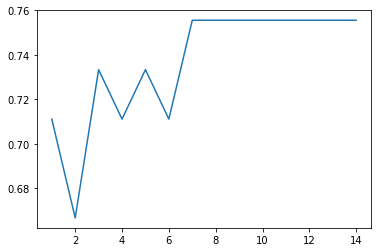

In [559]:
accuracy = []
acc=0
metric = 'manhattan'
k_voisin = np.arange(1,15)
for k in np.arange(1, 15):
    y_pred = knn(x_test,x_train, y_train, k, metric)
    acc = (np.sum(y_pred == np.array(np.transpose(y_test))))/(len(y_pred))
    accuracy=np.append(accuracy,acc)

plt.plot(k_voisin,accuracy)

In [560]:
k=13
y_pred=knn(x_test, x_train, y_train, k, metric);
print(y_pred)

['B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'C', 'C', 'C', 'C', 'C', 'B', 'B', 'C', 'C', 'B', 'B', 'C', 'C', 'B', 'B', 'C', 'C', 'B']


In [561]:
print(y_pred,'\n',np.array(np.transpose(y_test)))
print(len(y_pred))
acc = (np.sum(y_pred == np.array(np.transpose(y_test))))/(len(y_pred))
print(acc)

['B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'C', 'C', 'C', 'C', 'C', 'B', 'B', 'C', 'C', 'B', 'B', 'C', 'C', 'B', 'B', 'C', 'C', 'B'] 
 [['B' 'C' 'C' 'C' 'C' 'C' 'B' 'C' 'C' 'C' 'C' 'C' 'B' 'C' 'C' 'C' 'C' 'C'
  'C' 'B' 'C' 'C' 'C' 'C' 'C' 'C' 'B' 'B' 'B' 'C' 'B' 'B' 'B' 'B' 'C' 'C'
  'C' 'B' 'C' 'C' 'B' 'C' 'C' 'C' 'C']]
45
0.7555555555555555


In [562]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

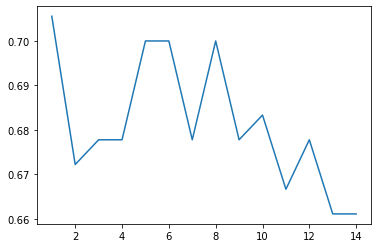

In [580]:
y_train=np.array(y_train)
y_train=np.ravel(y_train)
model = KNeighborsClassifier()
val_score = []
for k in np.arange(1,15):
    score = cross_val_score(KNeighborsClassifier(n_neighbors=k), x_train, y_train, cv=2).mean()
    val_score.append(score)
k_voisin=np.arange(1,15)
plt.plot(k_voisin,val_score)

param_grid = {'n_neighbors': np.arange(1,15),
              'metric': ['euclidean', 'manhattan','minkowski']}

grid = GridSearchCV(model, param_grid, cv=2)

grid.fit(x_train, y_train)



In [581]:
print(grid.best_score_)
print(grid.best_params_)

0.7333333333333334
{'metric': 'manhattan', 'n_neighbors': 7}


In [582]:
best = grid.best_estimator_
print(best)
y_pred_best = best.predict(x_test)
best.score(x_test, y_test)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)


0.7333333333333333

In [583]:
from joblib import dump, load
dump(best,'best_classifier')

['best_classifier']

In [584]:
le_modele=load('best_classifier')

In [585]:
print(le_modele)

KNeighborsClassifier(metric='manhattan', n_neighbors=7)
